In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from cartopy import config
import cartopy.crs as ccrs
from netCDF4 import num2date,date2num,Dataset


In [3]:
from marcus_py_tools import walklevel,latlon_from_xy
import pyart.graph.cm as pcm


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
import pyproj

In [55]:
import matplotlib.gridspec as gridspec

In [20]:
filenm = 'Tgrid_020.nc'
nc = Dataset(filenm,'r')
zhh = nc.variables['reflectivity'][0,:,:,:]
zdr = nc.variables['differential_reflectivity'][0,:,:,:]
rho = nc.variables['cross_correlation_ratio'][0,:,:,:]
xd  = nc.variables['x'][:]
yd  = nc.variables['y'][:]
zd  = nc.variables['z'][:]
rlat = nc.variables['radar_latitude'][0]
rlon = nc.variables['radar_longitude'][0]
nc.close()
#lats,lons = latlon_form_xy()

In [21]:
lats,lons = latlon_from_xy(xd,yd,rlat,rlon)

In [7]:
print(zd)

[    0.   500.  1000.  1500.  2000.  2500.  3000.  3500.  4000.  4500.
  5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000. 10500. 11000. 11500. 12000. 12500. 13000. 13500. 14000. 14500.
 15000.]


In [22]:
#..Define some fields from the reflectivity
zhh_3km = zhh[6,:,:]
zhh_comp = zhh.max(axis=0)
zhh_int2to8 = zhh[4:17,:,:].sum(axis=0)

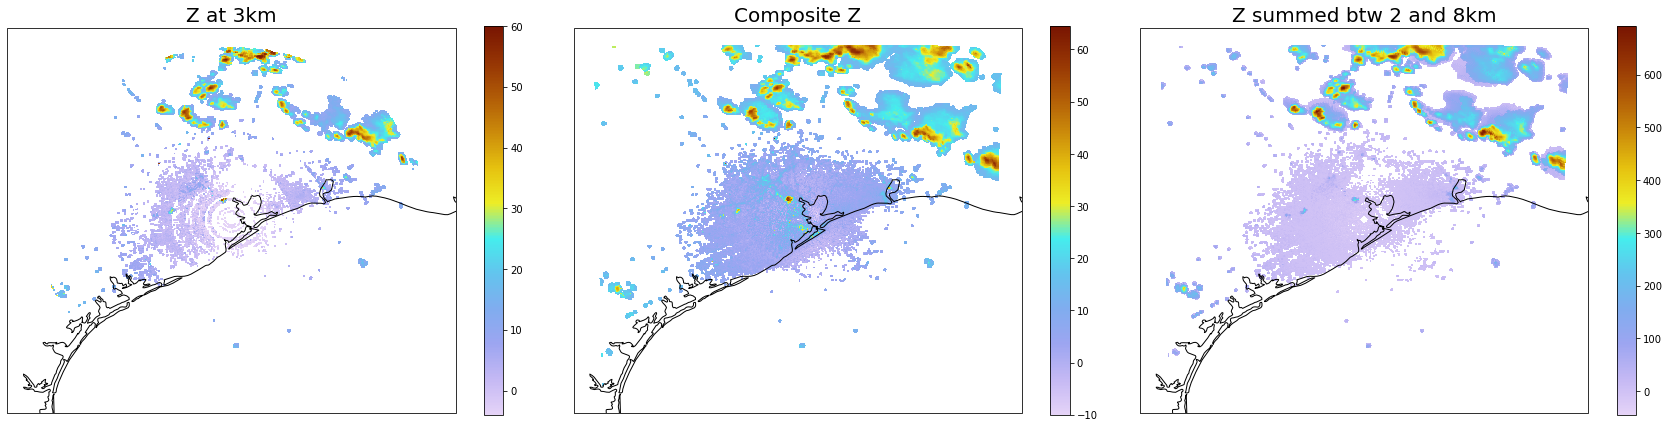

In [65]:
fig = plt.figure(figsize=(24,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
gs = gridspec.GridSpec(1,3)
ax0 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
cmo=ax0.pcolormesh(lons, lats, zhh_3km,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12,vmin=-4.,vmax=60.)
plt.title('Z at 3km',fontsize=20)
plt.colorbar(cmo)

ax0.coastlines()
ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
cmo=ax1.pcolormesh(lons, lats, zhh_comp,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Composite Z',fontsize=20)
plt.colorbar(cmo)

ax1.coastlines()
ax2 = fig.add_subplot(gs[2],projection=ccrs.PlateCarree())
cmo=ax2.pcolormesh(lons, lats, zhh_int2to8,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Z summed btw 2 and 8km',fontsize=20)
plt.colorbar(cmo)

ax2.coastlines()
gs.update(left=0.01,right=.99,top=.95,bottom=.05,wspace=.01)
#plt.show()
fig.savefig('comparison_2dfields_nomask.png')


In [24]:
#..do a bit more processing to see if we can pick up something more
zhh_m10dBz = np.ma.masked_where(zhh<10.,zhh)
#..Now the same things
zhh_m_3km = zhh_m10dBz[6,:,:]
zhh_m_comp = zhh_m10dBz.max(axis=0)
zhh_m_int2to8 = zhh_m10dBz[4:17,:,:].sum(axis=0)

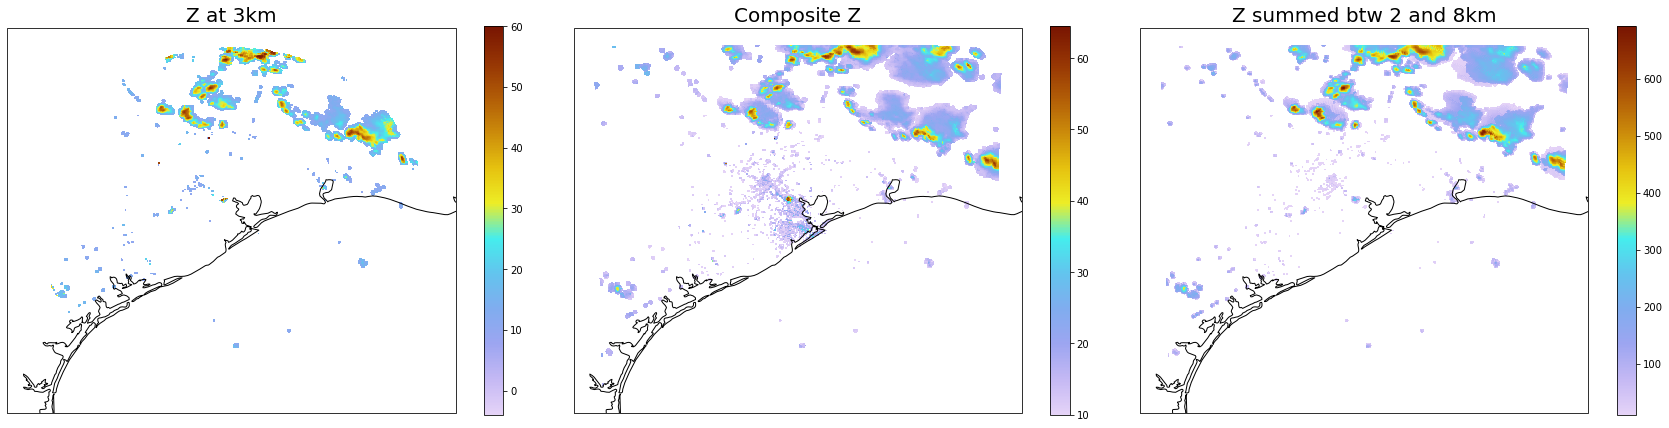

In [64]:
fig = plt.figure(figsize=(24,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
gs = gridspec.GridSpec(1,3)
ax0 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
cmo=ax0.pcolormesh(lons, lats, zhh_m_3km,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12,vmin=-4.,vmax=60.)
plt.title('Z at 3km',fontsize=20)
plt.colorbar(cmo)

ax0.coastlines()
ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
cmo=ax1.pcolormesh(lons, lats, zhh_m_comp,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Composite Z',fontsize=20)
plt.colorbar(cmo)

ax1.coastlines()
ax2 = fig.add_subplot(gs[2],projection=ccrs.PlateCarree())
cmo=ax2.pcolormesh(lons, lats, zhh_m_int2to8,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Z summed btw 2 and 8km',fontsize=20)
plt.colorbar(cmo)

ax2.coastlines()
gs.update(left=0.01,right=.99,top=.95,bottom=.05,wspace=.01)
fig.savefig('comparison_2dfields_zmask.png')
#plt.show()

In [26]:
filenm = 'Tgrid_020.nc'
nc = Dataset(filenm,'r')
zdr = nc.variables['differential_reflectivity'][0,:,:,:]
nc.close()
#..do a bit even more processing to see if we can pick up something more
zhh_mmore = np.ma.masked_where(zdr<0.5,zhh_m10dBz)
#..Now the same things
zhh_mm_3km = zhh_mmore[6,:,:]
zhh_mm_comp = zhh_mmore.max(axis=0)
zhh_mm_int2to8 = zhh_mmore[4:17,:,:].sum(axis=0)

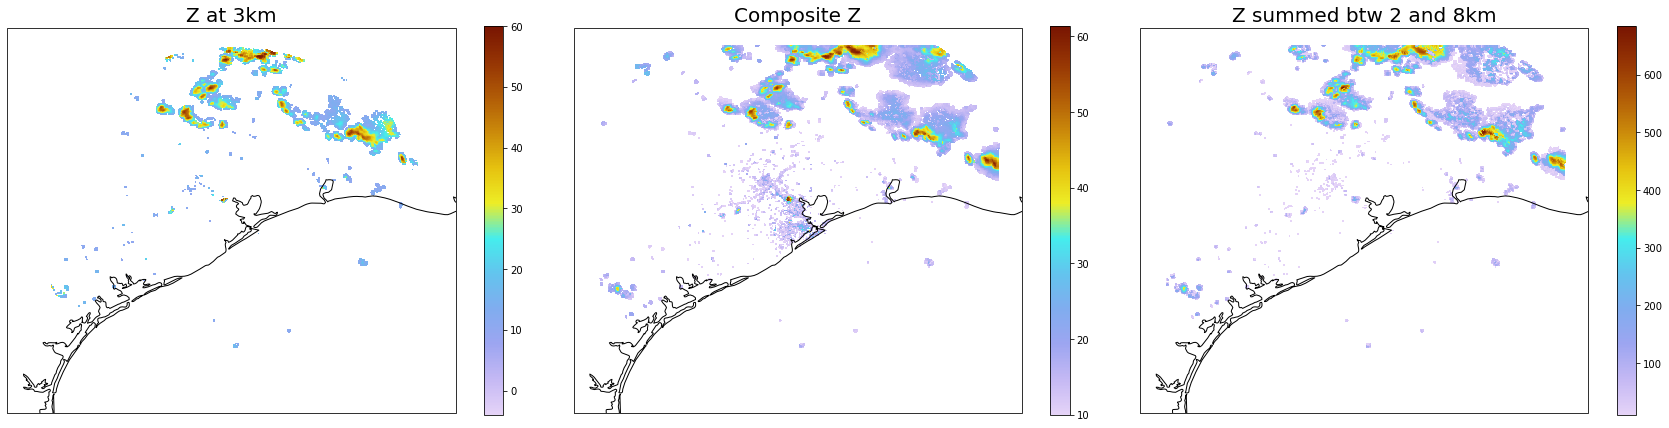

In [62]:
fig = plt.figure(figsize=(24,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
gs = gridspec.GridSpec(1,3)
ax0 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
cmo=ax0.pcolormesh(lons, lats, zhh_mm_3km,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12,vmin=-4.,vmax=60.)
plt.title('Z at 3km',fontsize=20)
plt.colorbar(cmo)

ax0.coastlines()
ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
cmo=ax1.pcolormesh(lons, lats, zhh_mm_comp,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Composite Z',fontsize=20)
plt.colorbar(cmo)

ax1.coastlines()
ax2 = fig.add_subplot(gs[2],projection=ccrs.PlateCarree())
cmo=ax2.pcolormesh(lons, lats, zhh_mm_int2to8,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Z summed btw 2 and 8km',fontsize=20)
plt.colorbar(cmo)

ax2.coastlines()
gs.update(left=0.01,right=.99,top=.95,bottom=.05,wspace=.01)
fig.savefig('comparison_2dfields_zdrzmask.png')
#plt.show()

In [28]:
#..do a bit even more processing to see if we can pick up something more
zhh_mmmore = np.ma.masked_where(rho<0.95,zhh_m10dBz)
#..Now the same things
zhh_mmm_3km = zhh_mmmore[6,:,:]
zhh_mmm_comp = zhh_mmmore.max(axis=0)
zhh_mmm_int2to8 = zhh_mmmore[4:17,:,:].sum(axis=0)

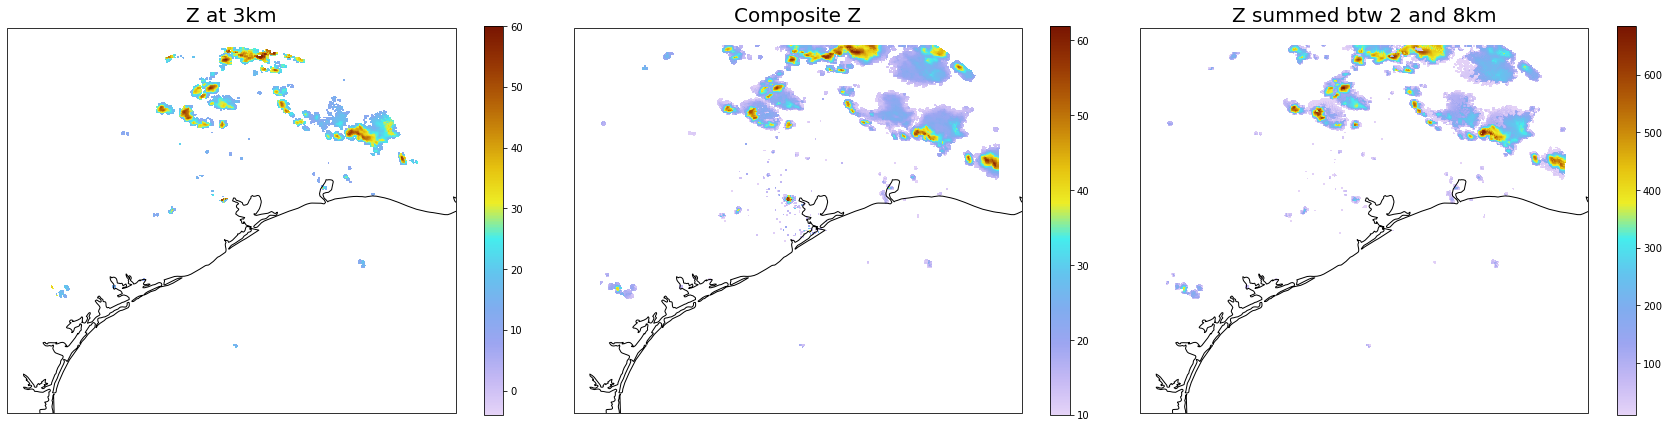

In [63]:
fig = plt.figure(figsize=(24,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
gs = gridspec.GridSpec(1,3)
ax0 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
cmo=ax0.pcolormesh(lons, lats, zhh_mmm_3km,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12,vmin=-4.,vmax=60.)
plt.title('Z at 3km',fontsize=20)
plt.colorbar(cmo)

ax0.coastlines()
ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
cmo=ax1.pcolormesh(lons, lats, zhh_mmm_comp,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Composite Z',fontsize=20)
plt.colorbar(cmo)

ax1.coastlines()
ax2 = fig.add_subplot(gs[2],projection=ccrs.PlateCarree())
cmo=ax2.pcolormesh(lons, lats, zhh_mmm_int2to8,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Z summed btw 2 and 8km',fontsize=20)
plt.colorbar(cmo)

ax2.coastlines()
gs.update(left=0.01,right=.99,top=.95,bottom=.05,wspace=.01)
fig.savefig('comparison_2dfields_rhozmask.png')
#plt.show()

In [66]:
#..We'll assume the rho-z mask is the best and plot some animations. This is "first cut" --- 
#..we'll expand the times and refine the regions highlighted later
basepath = './'
filepre = 'Tgrid'
outpath = '/home/marcus/marcus_data/ASR_TRACER_data/plots/'
outpre = 'khgx_tgrid_rhozmask_'
#..
filess = []
numfiles  = 0
for root,dirs,files in walklevel(basepath,level=0):
    for file in files:
        if file.startswith(filepre):
            filess.append(file)
            numfiles += 1
filess = sorted(filess)

for i in range(numfiles):
    nc = Dataset(filess[i],'r')
    zhh = nc.variables['reflectivity'][0,:,:,:]
    #zdr = nc.variables['differential_reflectivity'][0,:,:,:]
    rho = nc.variables['cross_correlation_ratio'][0,:,:,:]
    nc.close()
    #..
    #..do a bit even more processing to see if we can pick up something more
    zhh_m10dBz = np.ma.masked_where(zhh<10.,zhh)
    zhh_mmmore = np.ma.masked_where(rho<0.95,zhh_m10dBz)
    #..Now the same things
    zhh_mmm_3km = zhh_mmmore[6,:,:]
    zhh_mmm_comp = zhh_mmmore.max(axis=0)
    zhh_mmm_int2to8 = zhh_mmmore[4:17,:,:].sum(axis=0)
    
    #..Now plot that crap
    fig = plt.figure(figsize=(24,6))
    #ax = plt.axes(projection=ccrs.PlateCarree())
    gs = gridspec.GridSpec(1,3)
    ax0 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
    cmo=ax0.pcolormesh(lons, lats, zhh_mmm_3km,
                 transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12,vmin=-4.,vmax=60.)
    plt.title('Z at 3km',fontsize=20)
    plt.colorbar(cmo)

    ax0.coastlines()
    ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
    cmo=ax1.pcolormesh(lons, lats, zhh_mmm_comp,
                 transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
    plt.title('Composite Z',fontsize=20)
    plt.colorbar(cmo)

    ax1.coastlines()
    ax2 = fig.add_subplot(gs[2],projection=ccrs.PlateCarree())
    cmo=ax2.pcolormesh(lons, lats, zhh_mmm_int2to8,
                 transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
    plt.title('Z summed btw 2 and 8km',fontsize=20)
    plt.colorbar(cmo)

    ax2.coastlines()
    gs.update(left=0.01,right=.99,top=.95,bottom=.05,wspace=.01)
    #plt.suptitle('T)
    fig.savefig(outpath+outpre+str(i).zfill(3)+'.png')
    fig.clf()
    plt.close(fig)


/home/marcus/miniconda3/envs/cmac_env/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


In [71]:
#..The same but with a "zoom"
#..We'll assume the rho-z mask is the best and plot some animations. This is "first cut" --- 
#..we'll expand the times and refine the regions highlighted later
basepath = './'
filepre = 'Tgrid'
outpath = '/home/marcus/marcus_data/ASR_TRACER_data/plots/'
outpre = 'khgx_tgrid_rhozmask_'
#..
filess = []
numfiles  = 0
for root,dirs,files in walklevel(basepath,level=0):
    for file in files:
        if file.startswith(filepre):
            filess.append(file)
            numfiles += 1
filess = sorted(filess)

for i in range(numfiles):
    nc = Dataset(filess[i],'r')
    zhh = nc.variables['reflectivity'][0,:,:,:]
    #zdr = nc.variables['differential_reflectivity'][0,:,:,:]
    rho = nc.variables['cross_correlation_ratio'][0,:,:,:]
    nc.close()
    #..
    #..do a bit even more processing to see if we can pick up something more
    zhh_m10dBz = np.ma.masked_where(zhh<10.,zhh)
    zhh_mmmore = np.ma.masked_where(rho<0.95,zhh_m10dBz)
    #..Now the same things
    zhh_mmm_3km = zhh_mmmore[6,:,:]
    zhh_mmm_comp = zhh_mmmore.max(axis=0)
    zhh_mmm_int2to8 = zhh_mmmore[4:17,:,:].sum(axis=0)
    
    #..Now plot that crap
    fig = plt.figure(figsize=(24,6))
    #ax = plt.axes(projection=ccrs.PlateCarree())
    gs = gridspec.GridSpec(1,3)
    ax0 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
    cmo=ax0.pcolormesh(lons, lats, zhh_mmm_3km,
                 transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12,vmin=-4.,vmax=60.)
    ax0.set_extent([-96,-93.5,29,31.5])
    plt.title('Z at 3km',fontsize=20)
    plt.colorbar(cmo)

    ax0.coastlines()
    ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
    cmo=ax1.pcolormesh(lons, lats, zhh_mmm_comp,
                 transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
    ax1.set_extent([-96,-93.5,29,31.5])
    plt.title('Composite Z',fontsize=20)
    plt.colorbar(cmo)

    ax1.coastlines()
    ax2 = fig.add_subplot(gs[2],projection=ccrs.PlateCarree())
    cmo=ax2.pcolormesh(lons, lats, zhh_mmm_int2to8,
                 transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
    ax2.set_extent([-96,-93.5,29,31.5])
    plt.title('Z summed btw 2 and 8km',fontsize=20)
    plt.colorbar(cmo)

    ax2.coastlines()
    gs.update(left=0.01,right=.99,top=.95,bottom=.05,wspace=.01)
    #plt.suptitle('T)
    fig.savefig(outpath+outpre+str(i).zfill(3)+'.png')
    fig.clf()
    plt.close(fig)


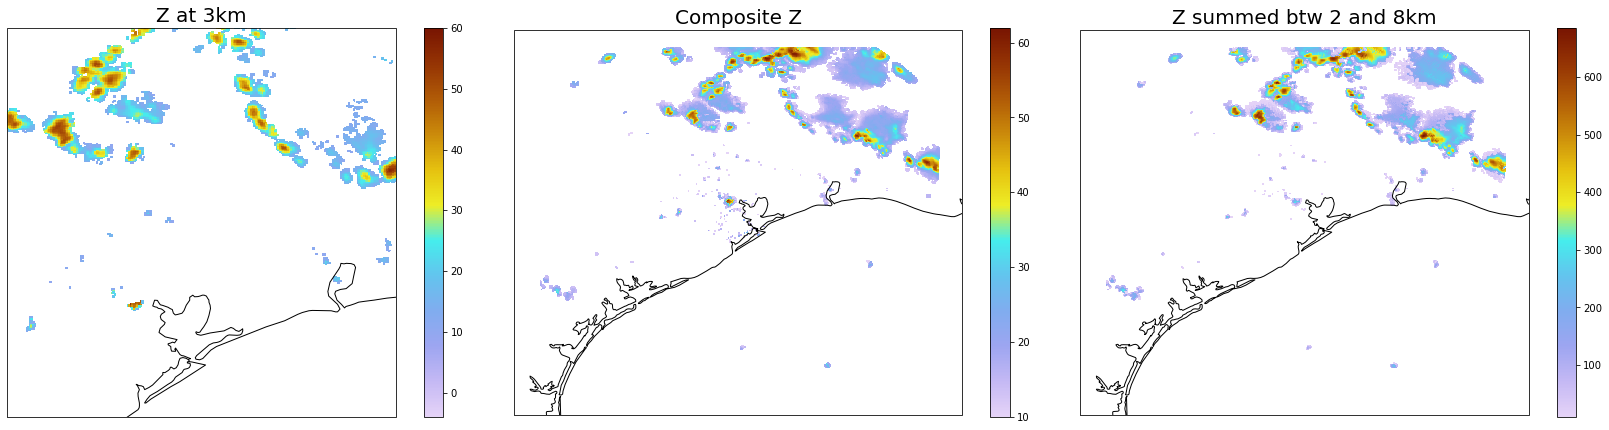

In [70]:
fig = plt.figure(figsize=(24,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
gs = gridspec.GridSpec(1,3)
ax0 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
cmo=ax0.pcolormesh(lons, lats, zhh_mmm_3km,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12,vmin=-4.,vmax=60.)
ax0.set_extent([-96,-93.5,29,31.5])
plt.title('Z at 3km',fontsize=20)
plt.colorbar(cmo)

ax0.coastlines()
ax1 = fig.add_subplot(gs[1],projection=ccrs.PlateCarree())
cmo=ax1.pcolormesh(lons, lats, zhh_mmm_comp,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Composite Z',fontsize=20)
plt.colorbar(cmo)

ax1.coastlines()
ax2 = fig.add_subplot(gs[2],projection=ccrs.PlateCarree())
cmo=ax2.pcolormesh(lons, lats, zhh_mmm_int2to8,
             transform=ccrs.PlateCarree(),cmap=pcm.LangRainbow12)
plt.title('Z summed btw 2 and 8km',fontsize=20)
plt.colorbar(cmo)

ax2.coastlines()
gs.update(left=0.01,right=.99,top=.95,bottom=.05,wspace=.01)
#g.savefig('comparison_2dfields_rhozmask.png')